<h1><b><font color = 'brown' size = "6">
Zipf's Law
</font></b></h1>

<h2>
<b>

<ul>
<font color = 'brown green' size = '5'>

<li>
According to Zipf's law, the number of times a word occurs in a corpus is inversely proportional to its rank in the frequency table.
</li><br>

<li>
In simple terms, if the words in a corpus are arranged in descending order of their frequency of occurrence, then the frequency of the word at the ith rank will be proportional to 1/i:
</li>

</font>
</ul>
</b>
</h2>

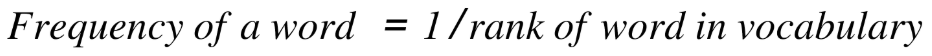

<h2>
<b>

<ul>
<font color = 'brown green' size = '5'>

<li>
This also means that the frequency of the most frequent word will be twice the
frequency of the second most frequent word.
</li><br>

<li>
For example, if we look at the Brown University Standard Corpus of Present-Day American English, the word "the" is the most frequent word (its frequency is 69,971), while the word "of" is the second most frequent (with a frequency of 36,411).
</li><br>

<li>
As we can see, its frequency is almost half of the most frequently occurring word. To get a better understanding of this, let's perform a simple exercise.
</li><br>

</font>
</ul>
</b>
</h2>

<h1><b><font color = 'brown'>
Exercise 01: Zipf's Law
</font></b></h1>

In this exercise, we will plot both the expected and actual ranks and frequencies of tokens with the help of Zipf's law.<br>
We will be using the **20newsgroups** dataset provided by the **sklearn** library, which is a collection of newsgroup documents.

1. Open a Jupyter Notebook.

2. Import the necessary libraries:

In [5]:
from pylab import *
import nltk

nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
import re
import string
from collections import Counter

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Add two methods for loading stop words and the data from the
**newsgroups_data_sample** variable:

In [6]:
def get_stop_words():

  stop_words = stopwords.words('english')
  stop_words = stop_words + list(string.printable) # string.printable will give the all sets of punctuation, digits,
                                                   # ascii_letters and whitespace.
  return stop_words

def get_and_prepare_data(stop_words):

  newsgroups_data_sample = fetch_20newsgroups(subset = 'train')

  tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data']
                      for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence))
                      if word.lower() not in stop_words
                     ]

  return tokenized_corpus

In the preceding code, there are two methods; **get_stop_words()** will load
stop word list from **nltk** data, while **get_and_prepare_data()** will load the **20newsgroups** data and remove stop words from it using the given stop
word list.

3. Add the following method to calculate the frequency of each token:

In [7]:
def get_frequency(corpus, n):
  token_count_id = Counter(corpus)
  return token_count_id.most_common(n)

4. Now, call all the preceding methods to calculate the frequency of the top 50
most frequent tokens:

In [8]:
stop_word_list = get_stop_words()
corpus = get_and_prepare_data(stop_word_list)
get_frequency(corpus, 50)

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

5. Plot the actual ranks of words that we got from frequency dictionary and the
ranks expected as per Zipf's law. Calculate the frequencies of the top 10,000
words using the preceding **get_frequency()** method and the expected frequencies of the same list using Zipf's law. For this, create two lists—an **actual_frequencies** and an **expected_frequencies** list. Use the log
of actual frequencies to downscale the numbers. After getting the actual and
expected frequencies, plot them using matplotlib:

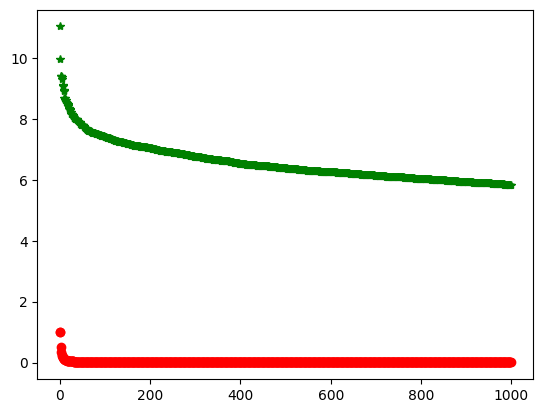

In [9]:
def get_actual_and_expected_frequencies(corpus):

  freq_dict = get_frequency(corpus, 1000)
  actual_frequencies = []
  expected_frequencies = []

  for rank, tup in enumerate(freq_dict):
    actual_frequencies.append(log(tup[1]))
    rank = 1 if rank == 0 else rank
    # expected frequency 1/rank as per zipf's law
    expected_frequencies.append(1 / rank)

  return actual_frequencies, expected_frequencies

def plot(actual_frequencies, expected_frequencies):
  plt.plot(actual_frequencies, 'g*', expected_frequencies, 'ro')
  plt.show()

# We will plot the actual and expected frequencies
actual_frequencies, expected_frequencies = get_actual_and_expected_frequencies(corpus)
plot(actual_frequencies, expected_frequencies)